In [ ]:
import pandas
import matplotlib.pyplot as plt

w: float
b: float
test_w: float
test_b: float
data = list[tuple[float, float]]()


In [ ]:
def direct_input() -> list[tuple[float, float]]:
  print("2개의 변수(실수)를 입력하고, 멈추려면 입력 없이 Enter를 누르세요")
  while True:
    text = input().split()
    if len(text) == 0:
      break
    else:
      point: tuple[float, float] = (float(text[0]), float(text[1]))
      data.append(point)
  return data

In [ ]:

def csv_input() -> list[tuple[float, float]]:
    csv_path = input("불러올 csv 파일의 경로를 입력하세요. (예: C:/Users/user/Downloads/data.csv)")
    csv = pandas.read_csv(csv_path, encoding="cp949")
    for idx, column in enumerate(csv.columns):
        print(f"[{idx}] {column}")
    x = int(input("x축으로 사용할 열의 번호를 입력하세요."))
    y = int(input("y축으로 사용할 열의 번호를 입력하세요."))
    data = [(float(row[x]), float(row[y])) for index, row in csv.iterrows()]
    return data

In [ ]:
start = input("[1] 데이터 직접 입력 [2] csv 파일 불러오기: ")
if start == "1":
  data = direct_input()
elif start == "2":
  data = csv_input()
else:
  exit()
if len(data) == 0:
  exit()

[1] 데이터 직접 입력 [2] csv 파일 불러오기: 1
2개의 변수(실수)를 입력하고, 멈추려면 입력 없이 Enter를 누르세요
1 2
2 3
3 5
4 4
5 5
6 8
7 7
8 9
9 8



In [ ]:
def Loss(w: float, b: float) -> float: # 평균제곱오차 손실함수
  s: float = 0
  for i in data:
    pred = w * i[0] + b
    err = (pred - i[1]) ** 2
    s += err
  return s / len(data)

def Loss_pw(w: float, b: float) -> float: # 손실함수 가중치 도함수
  # 2x(wx + b - y)
  s: float = 0
  for i in data:
    s += 2 * i[0] * (w * i[0] + b - i[1])
  return s / len(data)

def Loss_pb(w: float, b: float) -> float: # 손실함수 편향 도함수
  # 2(wx + b - y)
  s: float = 0
  for i in data:
    s += 2 * (w * i[0] + b - i[1])
  return s / len(data)

In [59]:
test_w = (data[-1][1] - data[0][1]) / (data[-1][0] - data[0][0]) # 평균변화율
test_b = data[-1][1] - test_w * data[-1][0]

D = 0.01 # 손실함수 변화량 수렴 기준

In [60]:
lr = 0.01 # Learning Rate
while True:
  L_pw = Loss_pw(test_w, test_b)
  if abs(L_pw) <= D:
    break
  test_w -= L_pw * lr
  print(f"w: {test_w}, b: {test_b}, Loss: {Loss(test_w, test_b)}")

w = test_w

w: 0.8277777777777777, b: 1.25, Loss: 0.7810699588477366
w: 0.8562962962962962, b: 1.25, Loss: 0.7254940557841795
w: 0.866753086419753, b: 1.25, Loss: 0.7180221843723016
w: 0.8705872427983539, b: 1.25, Loss: 0.7170176327713709
w: 0.8719931001371742, b: 1.25, Loss: 0.716882576389468
w: 0.8725085811614083, b: 1.25, Loss: 0.716864418809234
w: 0.8726975908702942, b: 1.25, Loss: 0.7168619776234473


In [61]:
lr = 0.01 # Learning Rate
while True:
  L_pb = Loss_pb(w, test_b)
  if abs(L_pb) <= D:
    break
  test_b -= L_pb * lr
  print(f"w: {w}, b: {test_b}, Loss: {Loss(w, test_b)}")

b = test_b

w: 0.8726975908702942, b: 1.2510635742463039, Loss: 0.7167499897958846
w: 0.8726975908702942, b: 1.2521058770076816, Loss: 0.716642436686293
w: 0.8726975908702942, b: 1.2531273337138318, Loss: 0.7165391426798418
w: 0.8726975908702942, b: 1.2541283612858591, Loss: 0.716439939116046
w: 0.8726975908702942, b: 1.2551093683064458, Loss: 0.7163446640133765
w: 0.8726975908702942, b: 1.2560707551866208, Loss: 0.716253161804772
w: 0.8726975908702942, b: 1.2570129143291924, Loss: 0.7161652830836291
w: 0.8726975908702942, b: 1.2579362302889125, Loss: 0.7160808843598433
w: 0.8726975908702942, b: 1.2588410799294383, Loss: 0.715999827825519
w: 0.8726975908702942, b: 1.2597278325771535, Loss: 0.7159219811299548
w: 0.8726975908702942, b: 1.2605968501719143, Loss: 0.7158472171635343
w: 0.8726975908702942, b: 1.2614484874147798, Loss: 0.7157754138501841
w: 0.8726975908702942, b: 1.262283091912788, Loss: 0.7157064539480427
w: 0.8726975908702942, b: 1.2631010043208362, Loss: 0.7156402248580258
w: 0.872697

In [62]:
print(f"추세선 결과: y = {w:.6f}x ", end='')
if b >= 0:
  print("+ ", end='')
print(f"{b:.6f}")

추세선 결과: y = 0.872698x + 1.298276


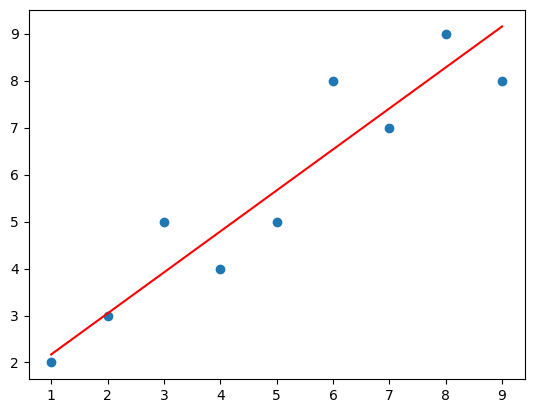

In [63]:
plt.scatter([i[0] for i in data], [i[1] for i in data])
plt.plot([i[0] for i in data], [w * i[0] + b for i in data], color='red')
plt.show()